In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('/kaggle/input/smokers-analysis/train.csv')

In [3]:
test = pd.read_csv('/kaggle/input/smokers-analysis/test.csv')

In [4]:
submission = pd.read_csv('/kaggle/input/smokers-analysis/sample_submission.csv')

In [5]:
train.tail()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
159251,159251,40,155,45,69.0,1.5,2.0,1,1,127,...,72,159,14.5,1,0.8,25,26,13,0,0
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1
159255,159255,40,145,45,76.4,1.0,1.2,1,1,125,...,87,81,14.0,1,0.8,21,16,17,0,0


In [6]:
test

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0


In [7]:
submission

,id,smoking
0,159256,0.5
1,159257,0.5
2,159258,0.5
3,159259,0.5
4,159260,0.5
...,...,...
106166,265422,0.5
106167,265423,0.5
106168,265424,0.5
106169,265425,0.5


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [9]:
train.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [10]:
data=train.dropna()

In [11]:
data.isnull().sum()

id                     0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [12]:
col_data = list(data.columns)

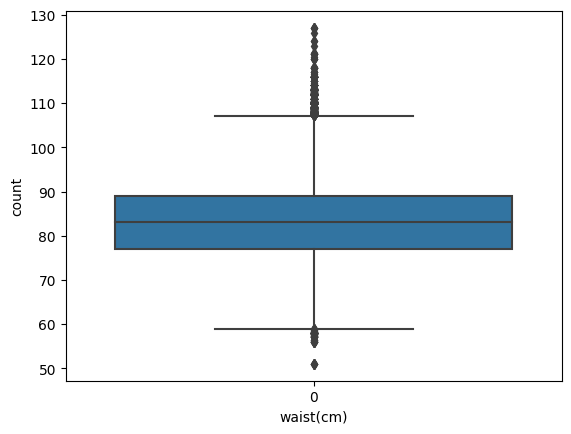

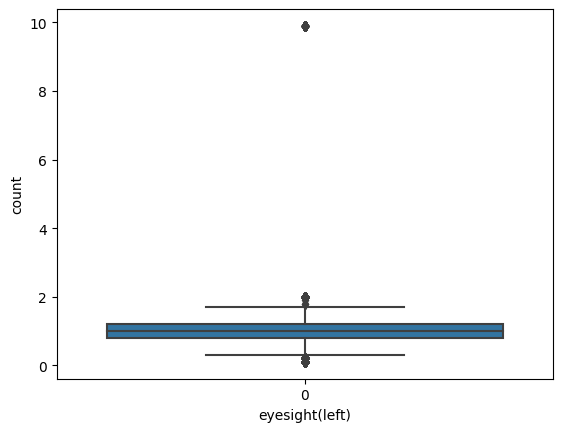

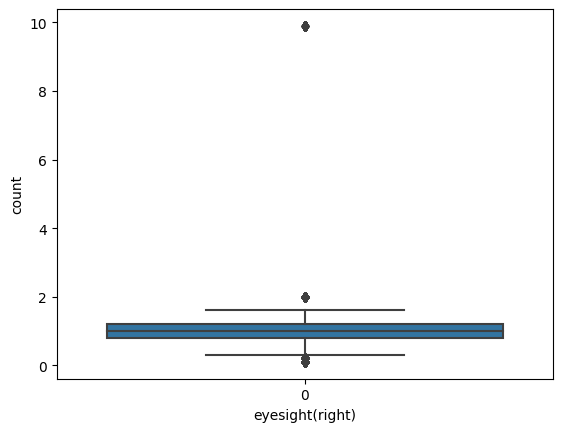

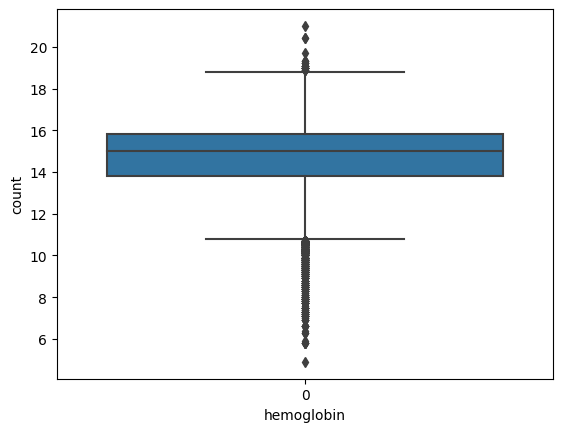

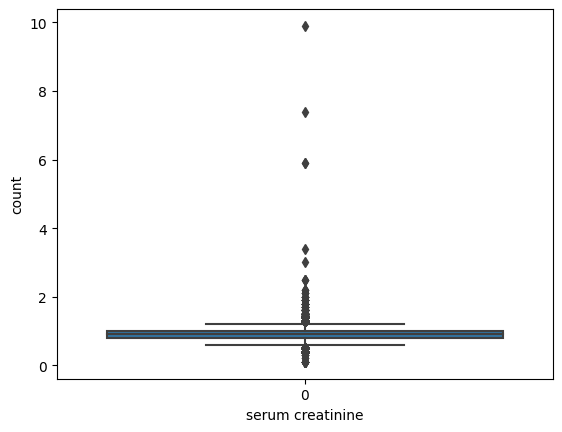

In [13]:
for col in col_data:
  if (data[col].dtype=='float64'):
    sns.boxplot(data[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

In [14]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

In [15]:
iqr = q3-q1

In [16]:
data=data[~((data<(q1-1.5*iqr))| (data>(q3+1.5*iqr))).any(axis=1)]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86188 entries, 2 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   86188 non-null  int64  
 1   age                  86188 non-null  int64  
 2   height(cm)           86188 non-null  int64  
 3   weight(kg)           86188 non-null  int64  
 4   waist(cm)            86188 non-null  float64
 5   eyesight(left)       86188 non-null  float64
 6   eyesight(right)      86188 non-null  float64
 7   hearing(left)        86188 non-null  int64  
 8   hearing(right)       86188 non-null  int64  
 9   systolic             86188 non-null  int64  
 10  relaxation           86188 non-null  int64  
 11  fasting blood sugar  86188 non-null  int64  
 12  Cholesterol          86188 non-null  int64  
 13  triglyceride         86188 non-null  int64  
 14  HDL                  86188 non-null  int64  
 15  LDL                  86188 non-null  int

In [18]:
data.duplicated().sum()

0

In [19]:
data.drop_duplicates()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
6,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
8,8,40,165,70,89.0,0.7,1.0,1,1,130,...,59,150,15.7,1,0.9,24,21,31,0,1
11,11,50,160,45,64.0,1.2,1.5,1,1,105,...,81,126,13.6,1,0.8,25,17,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159249,159249,40,170,85,91.4,1.2,0.9,1,1,110,...,45,125,16.1,1,0.9,26,44,37,0,1
159252,159252,50,155,75,82.0,1.0,1.0,1,1,120,...,64,108,14.5,1,0.6,21,20,18,0,0
159253,159253,40,160,50,66.0,1.5,1.0,1,1,114,...,87,93,10.9,1,0.6,15,9,12,0,0
159254,159254,50,165,75,92.0,1.2,1.0,1,1,121,...,55,80,14.4,1,1.1,22,17,37,0,1


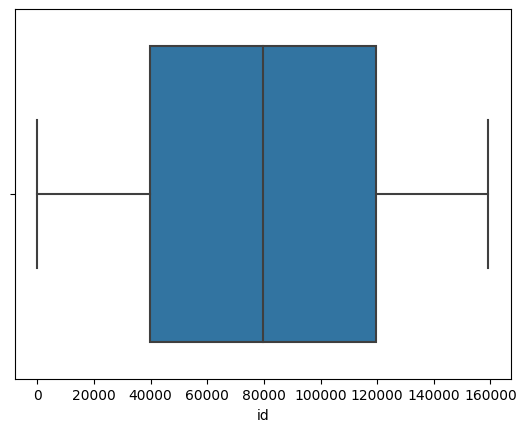

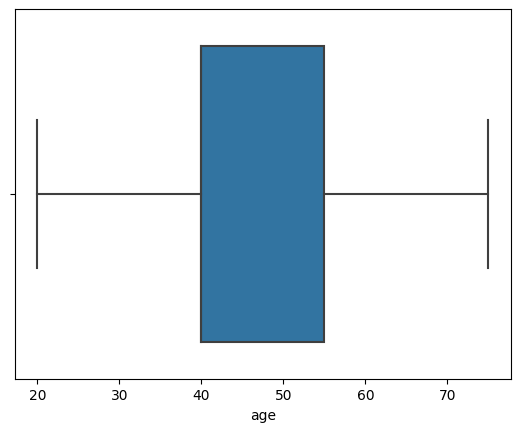

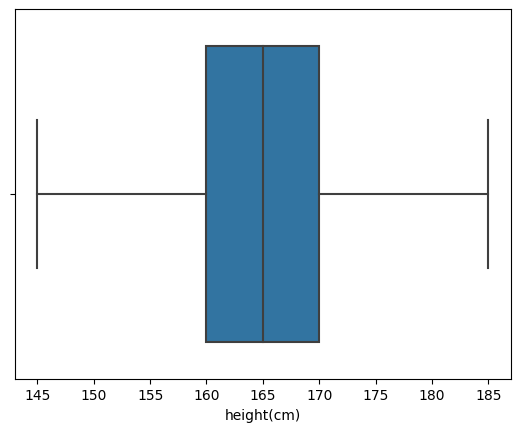

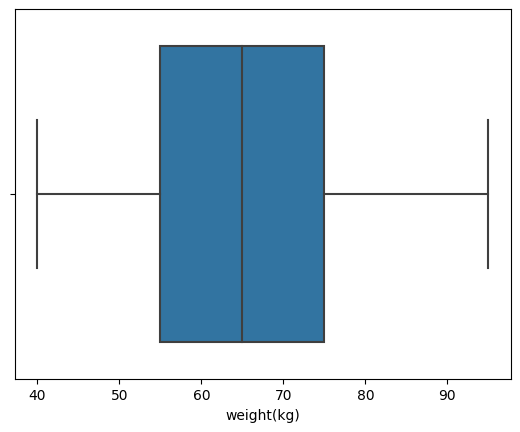

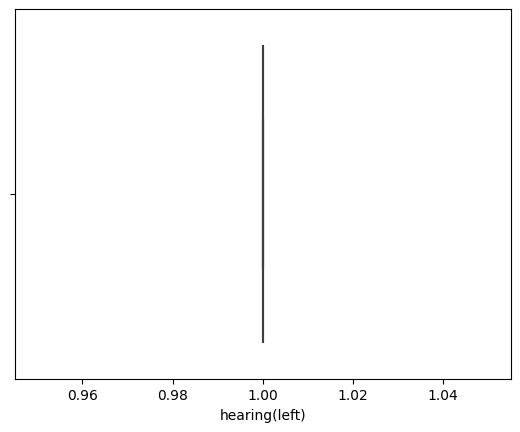

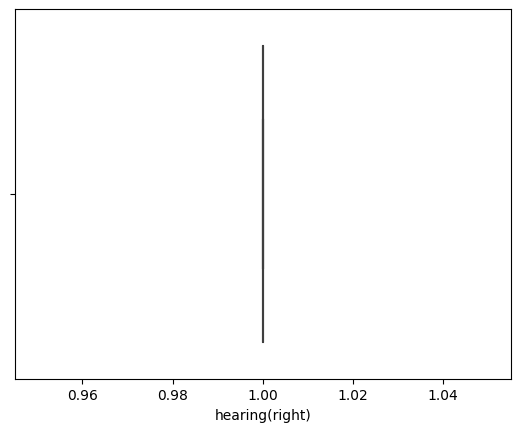

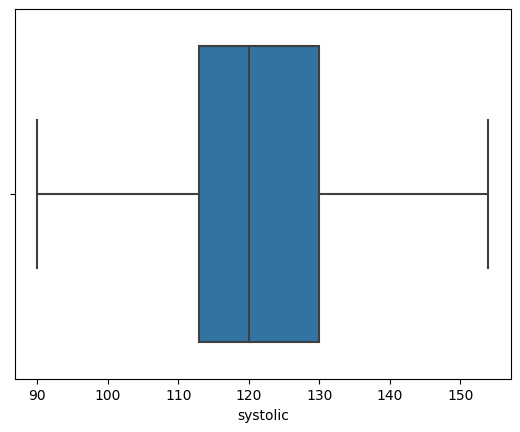

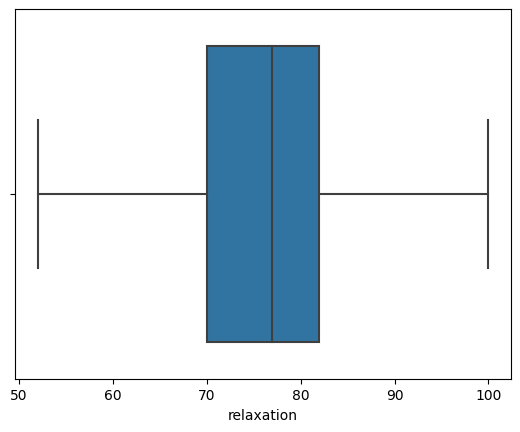

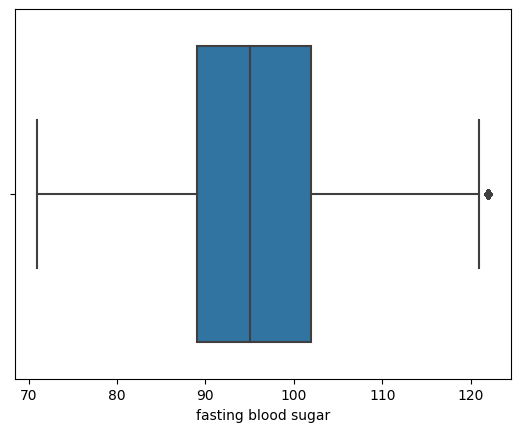

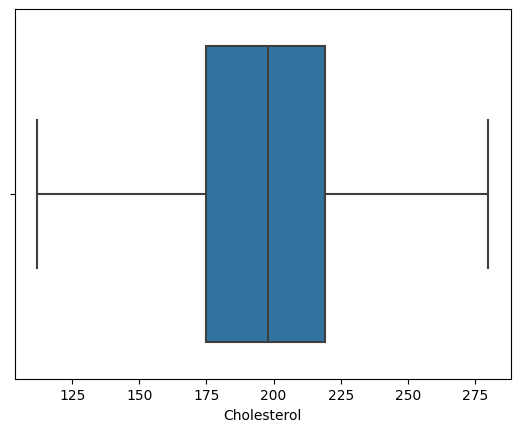

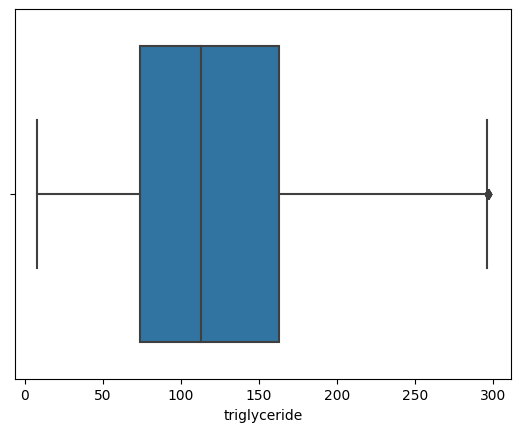

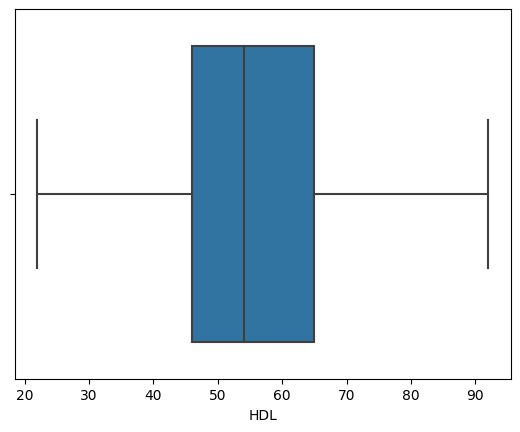

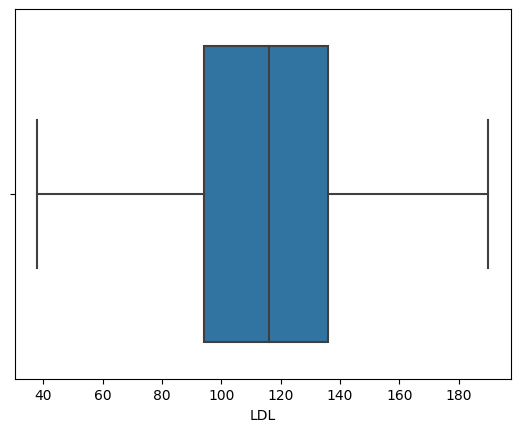

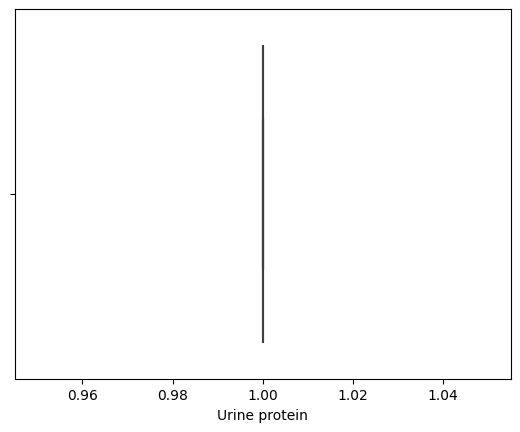

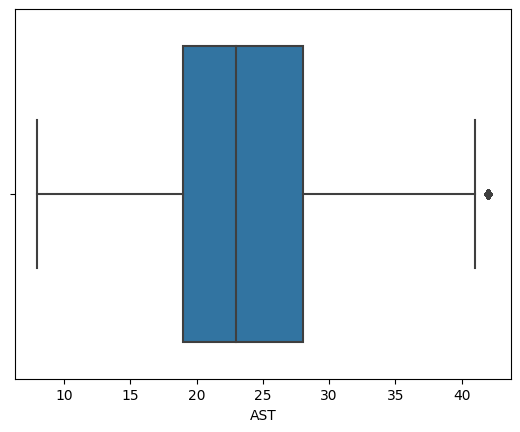

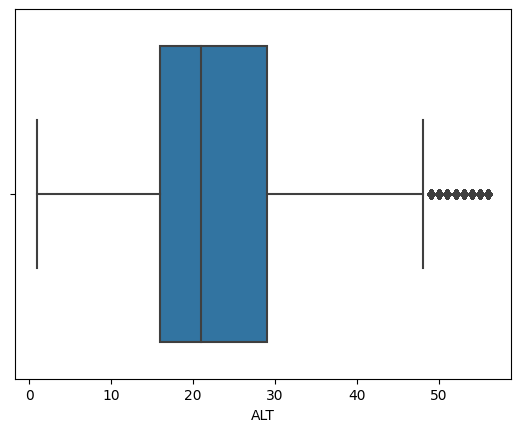

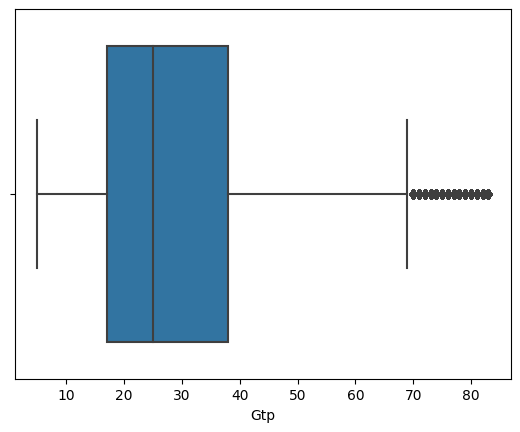

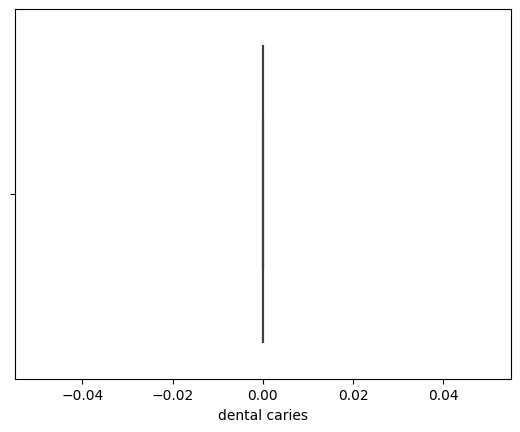

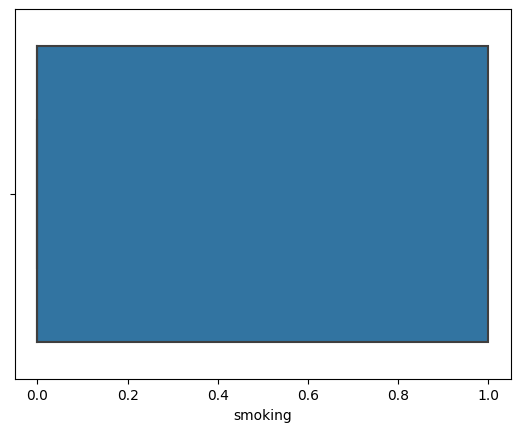

In [20]:
for col in data.columns:
  if data[col].dtype!='float64':
    sns.boxplot(data=data, x = col)
    plt.xlabel(col)
    plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
for col in data.columns:
  if data[col].dtype=='object':
    data[col] = le.fit_transform(data[col])

In [24]:
data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1
6,6,45,160,55,69.0,1.5,1.2,1,1,150,...,69,122,13.0,1,0.7,17,12,16,0,0
8,8,40,165,70,89.0,0.7,1.0,1,1,130,...,59,150,15.7,1,0.9,24,21,31,0,1
11,11,50,160,45,64.0,1.2,1.5,1,1,105,...,81,126,13.6,1,0.8,25,17,15,0,0


In [25]:
#data.drop('id', axis = 1 , inplace = True)

In [26]:
data.corr()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,1.000000,-0.004643,0.000637,-0.000101,-0.001814,-0.000053,-0.001872,NaN,NaN,-0.003521,...,0.003303,-0.002562,0.001421,NaN,-0.003784,0.000834,-0.001525,-0.000728,NaN,-0.000726
age,-0.004643,1.000000,-0.495380,-0.320647,-0.021225,-0.364721,-0.362881,NaN,NaN,0.159617,...,0.030272,0.187962,-0.295600,NaN,-0.189571,0.123785,-0.098048,-0.043577,NaN,-0.193568
height(cm),0.000637,-0.495380,1.000000,0.690227,0.395754,0.276365,0.284988,NaN,NaN,0.059498,...,-0.306992,-0.129247,0.590937,NaN,0.489868,0.004435,0.247851,0.286677,NaN,0.441216
weight(kg),-0.000101,-0.320647,0.690227,1.000000,0.816745,0.197043,0.204397,NaN,NaN,0.236932,...,-0.445011,0.045988,0.539988,NaN,0.421131,0.104956,0.422681,0.390899,NaN,0.341854
waist(cm),-0.001814,-0.021225,0.395754,0.816745,1.000000,0.055782,0.062936,NaN,NaN,0.296620,...,-0.452199,0.135071,0.411509,NaN,0.296235,0.152739,0.415461,0.391399,NaN,0.247277
eyesight(left),-0.000053,-0.364721,0.276365,0.197043,0.055782,1.000000,0.706092,NaN,NaN,-0.044130,...,-0.047271,-0.057175,0.180182,NaN,0.131129,-0.025992,0.092316,0.078097,NaN,0.125010
eyesight(right),-0.001872,-0.362881,0.284988,0.204397,0.062936,0.706092,1.000000,NaN,NaN,-0.038616,...,-0.055264,-0.057333,0.190839,NaN,0.133484,-0.021818,0.098952,0.086981,NaN,0.137500
hearing(left),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hearing(right),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
systolic,-0.003521,0.159617,0.059498,0.236932,0.296620,-0.044130,-0.038616,NaN,NaN,1.000000,...,-0.115654,0.068806,0.172218,NaN,0.056695,0.087719,0.129271,0.180726,NaN,0.047222


<Axes: >

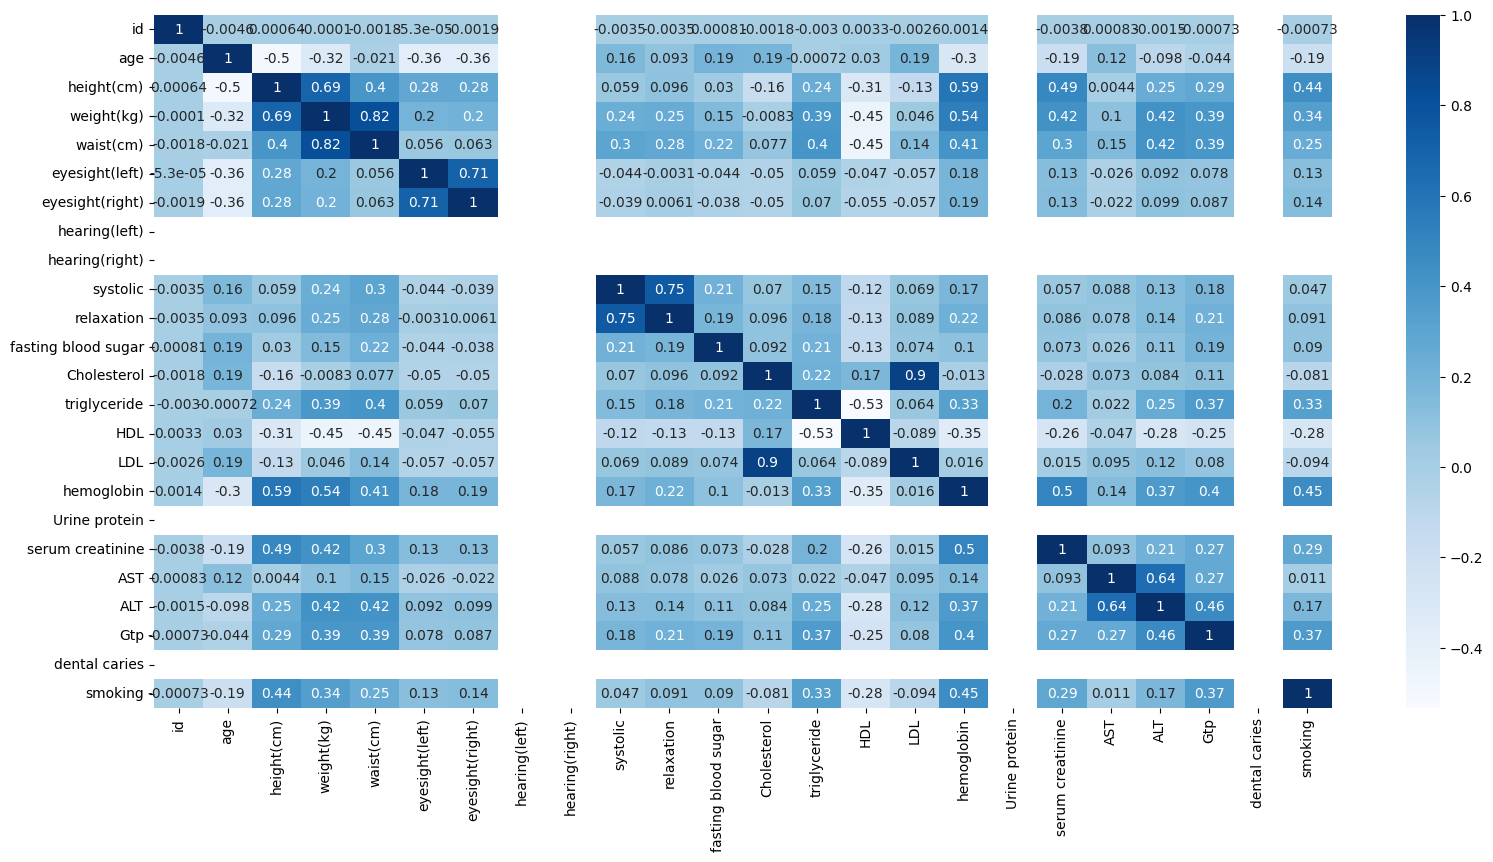

In [27]:
plt.figure(figsize = (19,9))
sns.heatmap(data.corr(), annot = True, cmap = 'Blues')

In [28]:
#data.drop('LDL',inplace = True, axis = 1)

<Axes: >

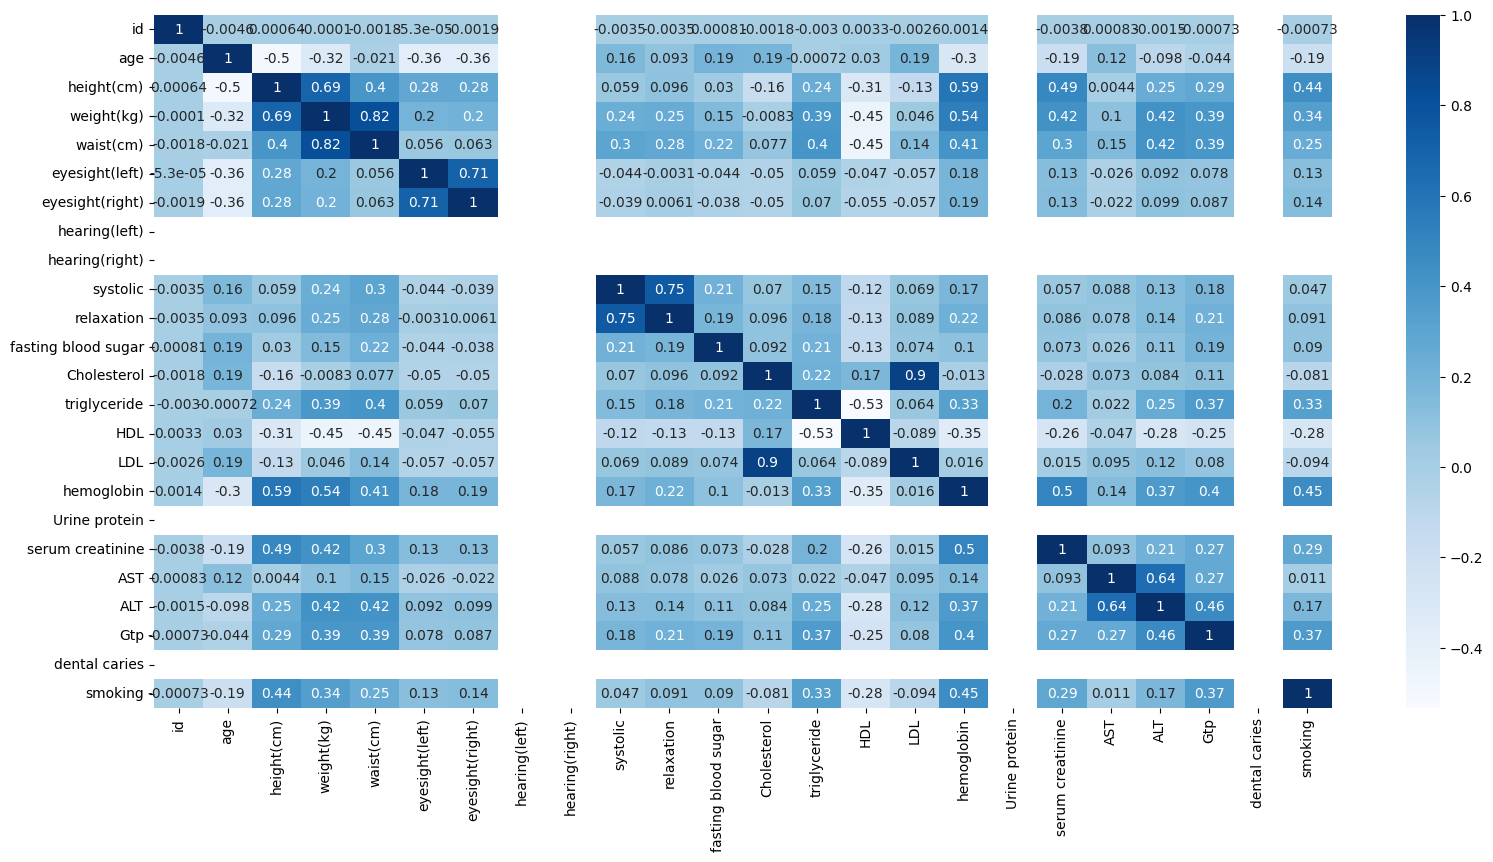

In [29]:
plt.figure(figsize = (19,9))
sns.heatmap(data.corr(), annot = True, cmap = 'Blues')

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
x = data.drop('smoking', axis = 1)

In [32]:
y = data['smoking']

In [33]:
vif_data = pd.DataFrame()
vif_data['Columns']=x.columns
vif_data['VIF Value']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,Columns,VIF Value
0,id,1.000120
1,age,1.840749
2,height(cm),3.028655
3,weight(kg),6.427371
4,waist(cm),4.257438
5,eyesight(left),2.055253
6,eyesight(right),2.060414
7,hearing(left),0.000000
8,hearing(right),0.000000
9,systolic,2.426342


In [34]:
#x.drop('weight(kg)',axis = 1 , inplace = True)

In [35]:
vif_data = pd.DataFrame()
vif_data['Columns']=x.columns
vif_data['VIF Value']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,Columns,VIF Value
0,id,1.000120
1,age,1.840749
2,height(cm),3.028655
3,weight(kg),6.427371
4,waist(cm),4.257438
5,eyesight(left),2.055253
6,eyesight(right),2.060414
7,hearing(left),0.000000
8,hearing(right),0.000000
9,systolic,2.426342


In [36]:
y

2         1
4         1
6         0
8         1
11        0
         ..
159249    1
159252    0
159253    0
159254    1
159255    0
Name: smoking, Length: 86188, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
array = data.values
validation_size = 0.20
seed = 7
scoring = 'accuracy'
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=100)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
lo_model = LogisticRegression()

In [41]:
lo_model.fit(x_train,y_train)

LogisticRegression()

In [42]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression  # Add the missing import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection

# Your model definitions
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

# Evaluation
names = []
results = []

seed = 42  # Set your seed value
scoring = 'accuracy'  # Set your desired scoring metric

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.728841 (0.003389)
LDA: 0.753268 (0.003718)
KNN: 0.648118 (0.005328)
CART: 0.694188 (0.004770)
NB: 0.723968 (0.003175)


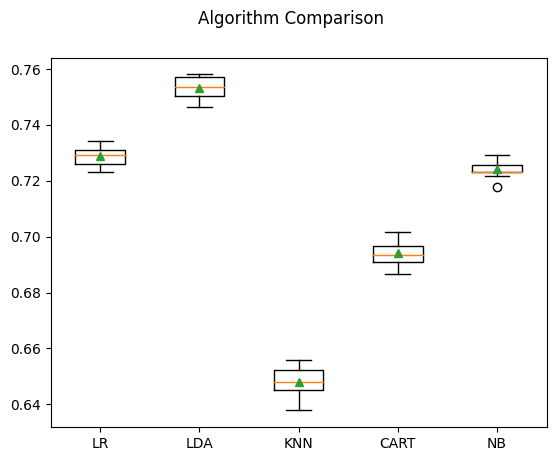

In [43]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results,showmeans = True)
ax.set_xticklabels(names)
plt.show()

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
lr=LogisticRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test , predictions))
print(classification_report(y_test ,predictions))

0.727340232979069
[[10141  2676]
 [ 3199  5531]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.78     12817
           1       0.67      0.63      0.65      8730

    accuracy                           0.73     21547
   macro avg       0.72      0.71      0.71     21547
weighted avg       0.73      0.73      0.73     21547



In [45]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)
predictions = LDA.predict(x_test)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test , predictions))
print(classification_report(y_test ,predictions))

0.751334292476911
[[9956 2861]
 [2497 6233]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79     12817
           1       0.69      0.71      0.70      8730

    accuracy                           0.75     21547
   macro avg       0.74      0.75      0.74     21547
weighted avg       0.75      0.75      0.75     21547



In [46]:
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
predictions = KNN.predict(x_test)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test , predictions))
print(classification_report(y_test ,predictions))

0.6523878034065067
[[9498 3319]
 [4171 4559]]
              precision    recall  f1-score   support

           0       0.69      0.74      0.72     12817
           1       0.58      0.52      0.55      8730

    accuracy                           0.65     21547
   macro avg       0.64      0.63      0.63     21547
weighted avg       0.65      0.65      0.65     21547



In [47]:
CART =  DecisionTreeClassifier()
CART.fit(x_train, y_train)
predictions = CART.predict(x_test)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test , predictions))
print(classification_report(y_test ,predictions))

0.6894231215482434
[[9471 3346]
 [3346 5384]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     12817
           1       0.62      0.62      0.62      8730

    accuracy                           0.69     21547
   macro avg       0.68      0.68      0.68     21547
weighted avg       0.69      0.69      0.69     21547



In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [50]:
y_pred_linear = reg.predict(x_test)

In [51]:
from sklearn.metrics import roc_auc_score

In [52]:
linear = roc_auc_score(y_test, y_pred_linear)
print(linear)

0.8365672256053829


In [53]:
y_pred = reg.predict(test)

In [54]:
#test.drop('id',axis = 1 , inplace = True)#print(y_pred[:100])

In [55]:
print(y_pred[:100])

[ 0.4535464   0.27934408  0.56476709  0.07878595  0.47221837  0.78052128
  0.28273828  0.18873212  0.15800684  0.09519569  0.56140133  0.16431786
  0.02741209  0.27829917 -0.13414819  0.81066146  0.89236823  0.91889479
  0.15996161  0.38975034  0.47038687  1.17112483  0.57397328  0.7668647
  0.09964279  0.94438988  0.71975488  0.49128264  0.73067888 -0.11641657
  0.7352472   0.02658866  0.20163576  0.66946571  0.80538956  0.46075377
  0.19112791  0.17215911  0.3153084   0.51135045  0.73867771 -0.06900094
  0.28268221 -0.1227588   0.0480502   0.11916703  0.17281141  0.08644589
  0.24065563  0.6886024   0.58998972  0.25293327  0.54831341  0.20208371
  0.47094653  0.64261114  0.40402022  0.6408772   0.56496743  0.64696736
  0.06549117  0.59357967  0.45009748  0.45309718  0.98384934  0.18501478
  0.47356622  0.91653997  0.25781523  0.47310308  0.72858042  0.6189456
  0.38471406  0.33845221  0.06891451  0.68622006  0.04655092 -0.19036987
  0.37088499  0.13578846  0.42414215  0.40967338  0.3

In [56]:
submission = pd.DataFrame({'id':test['id'], 'smoking': y_pred.round(1)})
submission

,id,smoking
0,159256,0.5
1,159257,0.3
2,159258,0.6
3,159259,0.1
4,159260,0.5
...,...,...
106166,265422,0.5
106167,265423,0.7
106168,265424,0.3
106169,265425,0.2


In [57]:
submission.to_csv('submission.csv',index = False)